# **Latihan 2 Komputasi Statistika (B)**
## Kelompok: 8

### Anggota Kelompok:
1. Muhamad Rakan Akmal (2106635745)
1. Raqi Akbar Robbani (2106652562)
1. Rima F Azahra (2106701974)
1. Wahyu Dimasdi Putra (2106704736)
1. Kamal Muftie Yafi (2106725034)


In [ ]:
# Importing Modules untuk Notebook ini

from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load data

url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
# Melihat info dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Melihat dataset

print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
# Melihat sample dataset untuk memahami data

data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,122,5.6,2.8,4.9,2.0,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [ ]:
# Melakukan split data X sebagai data yang akan dilakukan clustering
# data Y sebagai test apakah clustering yang dibuat sudah sesuai

X = data.iloc[:,1:5]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
41             4.5           2.3            1.3           0.3
2              4.7           3.2            1.3           0.2
124            6.7           3.3            5.7           2.1
51             6.4           3.2            4.5           1.5
26             5.0           3.4            1.6           0.4
133     Iris-virginica
73     Iris-versicolor
111     Iris-virginica
146     Iris-virginica
76     Iris-versicolor
Name: Species, dtype: object


In [ ]:
# Import module yang digunakan

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# melihat jumlah data species yang akan dijadikan target
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# membuat target data untuk clustering yang akan dibuat

data_target_1 = np.full(50, 0)
data_target_2 = np.full(50, 1)
data_target_3 = np.full(50, 2)

data_target = np.concatenate((data_target_1, data_target_2,data_target_3))


In [ ]:
# melihat data target yang dibuat

data_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **A) PetalLength vs. PetalWidth**

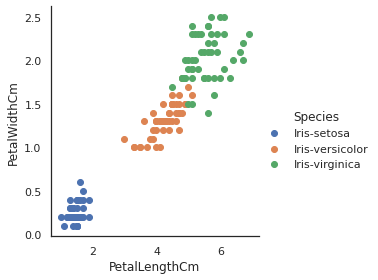

In [ ]:
# membuat plot data sesungguhnya untuk petal length dan petal width
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [ ]:
# mengambil data mengenai kedua info petal untuk clustering
# membuat data array mengenai keseluruhan data
# untuk memudahkan perhitungan

X_scaled_p = data.iloc[:,[3,4]].values
data_arr = data.drop(['Id', 'Species'], axis=1)
data_arr = data_arr.to_numpy()

##***Metode KMEANS PetalLength vs. PetalWidth***

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled_p)

# penentuan/predict cluster dari setiap data pada X
y_cluster_kmeans_p = km.predict(X_scaled_p)
y_cluster_kmeans_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# mengkalkulasikan baik atau tidaknya metode clustering yang dilakukan

from sklearn import metrics
score = metrics.silhouette_score(X_scaled_p, y_cluster_kmeans_p)
score

0.6602760882193361

terlihat bahwa scorenya adalah sebesar 0.6602760882193361 yang berarti untuk data ini, metode k-means cukup baik untuk digunakan sebagai metode clustering karena besarnya lebih dari 0.65.

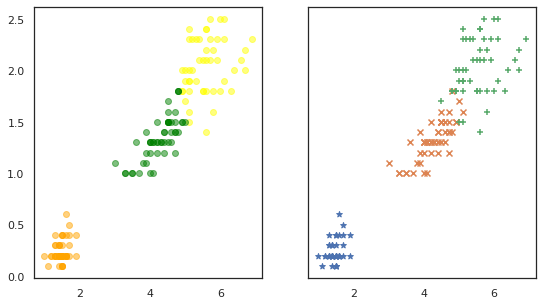

In [ ]:
# membuat plot clustering untuk kmeans

colors = ['orange', 'yellow', 'green']
markers = ['*','x','+']

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_scaled_p)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = data_arr[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = data_arr[data_target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

##***Metode GMM PetalLength vs. PetalWidth***

In [ ]:
#membuat prediksi clustering dengan metode GMM
from sklearn.mixture import GaussianMixture

gmm_p = GaussianMixture(n_components=nclusters)
gmm_p.fit(X_scaled_p)

y_cluster_gmm_p = gmm_p.predict(X_scaled_p)
y_cluster_gmm_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
## fits mixture model menggunakan metode EM
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(X_scaled_p) 

In [ ]:
from matplotlib.patches import Ellipse

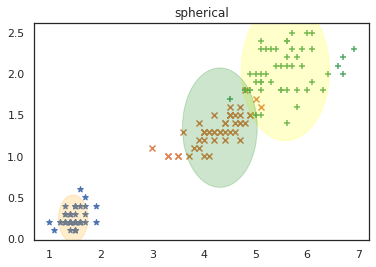

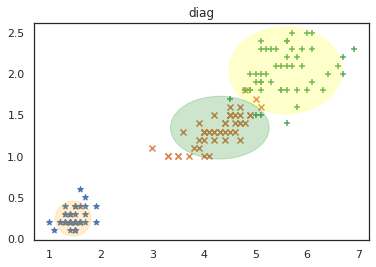

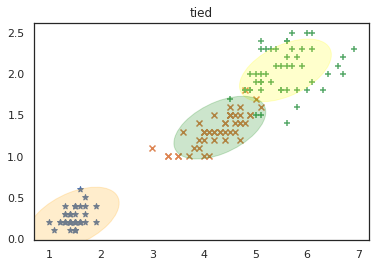

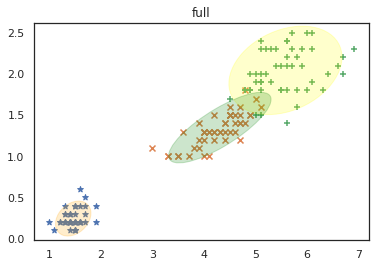

In [ ]:
colors = ['orange', 'yellow', 'green'] #membuat list warna untuk digunakan pada plot
markers = ['*','x','+'] #membuat list symbol sebagai representasi data pada plot

#plotting
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data_gmm = data_arr[data_target == n]
        plt.scatter(data_gmm[:, 2], data_gmm[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# **B) SepalLength vs SepalWidth**

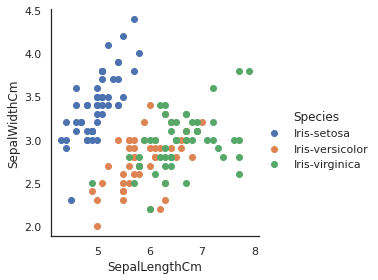

In [ ]:
# membuat scatter plot awal untuk comparing dengan hasil clustering
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

In [ ]:
X_scaled_s = data.iloc[:,[1,2]].values #mengambil data sepal length dan sepal width

##***METODE KMEANS***

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled_s)

# memprediksi clustering dengan metode KMeans
y_cluster_kmeans_s = km.predict(X_scaled_s)
y_cluster_kmeans_s

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#mengkalkulasikan baik atau tidaknya metode clustering yang dilakukan
from sklearn import metrics
score = metrics.silhouette_score(X_scaled_s, y_cluster_kmeans_s)
score

0.4434693231245126

terlihat bahwa scorenya adalah sebesar 0.4434693231245126 yang berarti untuk data ini, metode k-means kurang baik untuk digunakan sebagai metode clustering karena besarnya kurang dari 0.65.

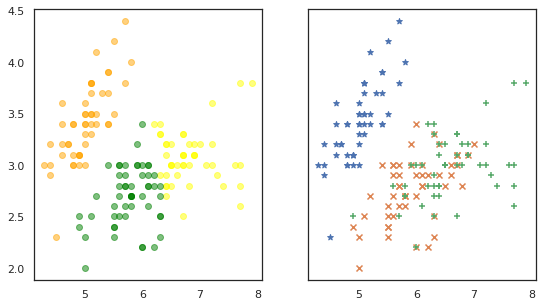

In [ ]:
#plotting dengan cluster k-means
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_scaled_s)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = data_arr[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 0], data_kmeanslabels[:, 1], color=colors[n], alpha=0.5)
    data_truelabels = data_arr[data_target == n]
    ax2.scatter(data_truelabels[:, 0], data_truelabels[:, 1], marker=markers[n])
plt.show()

##***METODE GMM***

In [ ]:
# memprediksi clustering dengan metode GMM
from sklearn.mixture import GaussianMixture

gmm_s = GaussianMixture(n_components=nclusters)
gmm_s.fit(X_scaled_s)

y_cluster_gmm_s = gmm_s.predict(X_scaled_s)
y_cluster_gmm_s

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(X_scaled_s) ## fits mixture model menggunakan EM

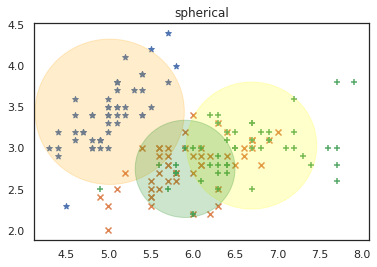

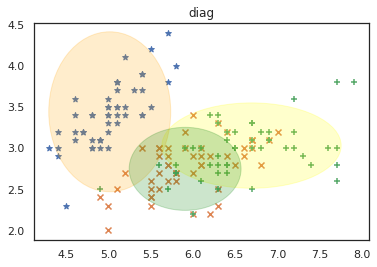

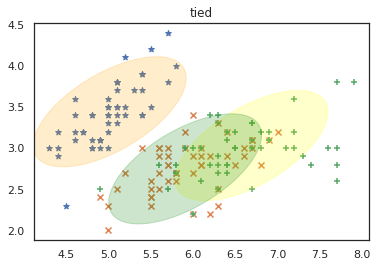

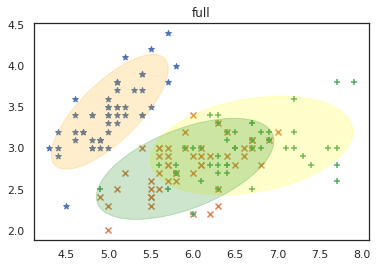

In [ ]:
# Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data_gmm = data_arr[data_target == n]
        plt.scatter(data_gmm[:, 0], data_gmm[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# **2. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.**

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
#adjusted score
score_kmeans_p = adjusted_rand_score(y, y_cluster_kmeans_p)
score_gmm_p = adjusted_rand_score(y, y_cluster_gmm_p)
print('Score Kmeans PetalLength vs. PetalWidth :',score_kmeans_p)
print('Score GMM PetalLength vs. PetalWidth :',score_gmm_p)


Score Kmeans PetalLength vs. PetalWidth : 0.8856970310281228
Score GMM PetalLength vs. PetalWidth : 0.9221767019765943


Dalam kasus membandingkan PetalLength vs PeptalWidth, Metode GMM Clustering pada adjusted rand_score memiliki nilai yang lebih besar dibandingkan Metode Kmeans Clustering. Sehingga dapat dikatakan Metode GMM Clustering lebih sesuai untuk digunakan karena lebih mendekati labels yang sebenarnya.

In [ ]:
#adjusted random score
score_kmeans_s = adjusted_rand_score(y, y_cluster_kmeans_s)
score_gmm_s = adjusted_rand_score(y, y_cluster_gmm_s)
print('Score Kmeans SepalLength vs. SepalWidth :',score_kmeans_s)
print('Score GMM SepalLength vs. SepalWidth :',score_gmm_s)

Score Kmeans SepalLength vs. SepalWidth : 0.6006861021484542
Score GMM SepalLength vs. SepalWidth : 0.5473439141421311


Dalam kasus membandingkan SepalLength vs SepalWidth, Metode Kmeans Clustering pada adjusted rand_score memiliki nilai yang lebih besar dibandingkan etode GMM Clustering. Sehingga dapat dikatakan Metode Kmeans Clusterin lebih sesuai untuk digunakan karena lebih mendekati labels yang sebenarnya.